In [41]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [43]:
df = pd.read_csv('D:/DA/Project/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [44]:
from matplotlib import axis


x=df.drop("Attrition",axis=1)
y=df["Attrition"].map({'Yes':1,'No':0})


In [45]:
import select

from django.urls import include


cat_cols=x.select_dtypes(include='object').columns
num_cols=x.select_dtypes(include='number').columns


In [46]:
ohe= OneHotEncoder(sparse_output=False,drop='first')
x_cat=pd.DataFrame(ohe.fit_transform(x[cat_cols]),index=x.index)


In [47]:
scaler=StandardScaler()
x_num=pd.DataFrame(scaler.fit_transform(x[num_cols]),index=x.index,columns=num_cols)


In [48]:
x_processed=pd.concat([x_num,x_cat],axis=1)
print(f"Processed feature matrix:{x_processed.shape}")

Processed feature matrix:(1470, 47)


In [49]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(
    x_processed,y,test_size=0.2,random_state=42,stratify=y)
print(f"train_test_split:{x_train.shape[0]}/{x_test.shape[0]}rows")

train_test_split:1176/294rows


In [50]:
print("Train attrition ratio:", y_train.mean())
print("Test  attrition ratio:", y_test.mean())


Train attrition ratio: 0.16156462585034015
Test  attrition ratio: 0.1598639455782313


In [51]:
x_train.columns = x_train.columns.astype(str)
x_test.columns = x_test.columns.astype(str)

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    results[name] = y_pred
    print(f"Trained {name}")


Trained Logistic Regression
Trained Decision Tree


In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

metrics = {}
for name, y_pred in results.items():
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    metrics[name] = dict(accuracy=acc, precision=prec, recall=rec, f1=f1, cm=cm)
    print(f"--- {name} ---")
    print(f"Accuracy: {acc:.2%}, Precision: {prec:.2%}, Recall: {rec:.2%}, F1: {f1:.2%}")
    print("Confusion Matrix:\n", cm)


--- Logistic Regression ---
Accuracy: 86.39%, Precision: 64.00%, Recall: 34.04%, F1: 44.44%
Confusion Matrix:
 [[238   9]
 [ 31  16]]
--- Decision Tree ---
Accuracy: 80.95%, Precision: 40.43%, Recall: 40.43%, F1: 40.43%
Confusion Matrix:
 [[219  28]
 [ 28  19]]


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


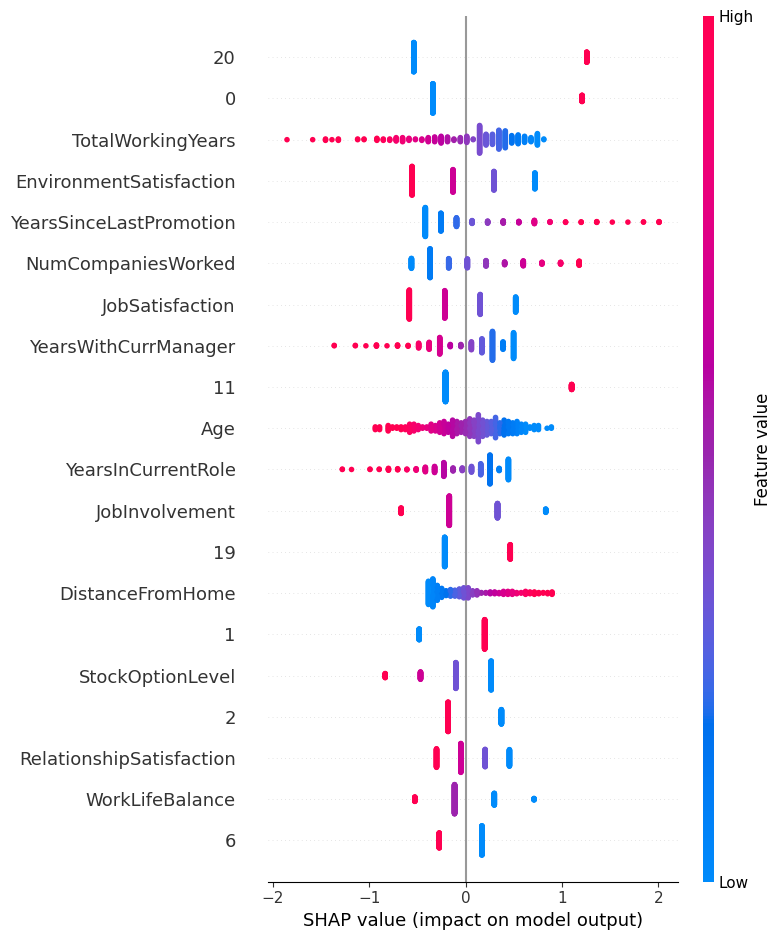

In [54]:
import shap

# Choose best model (based on highest F1 score)
best_name = max(metrics, key=lambda n: metrics[n]['f1'])
best_model = models[best_name]

# SHAP Explainer
explainer = shap.Explainer(best_model, x_train)   # <-- lowercase x_train
shap_values = explainer(x_test)                   # <-- lowercase x_test

# SHAP summary plot
shap.summary_plot(shap_values, x_test)


In [ ]:

dept_attrition = df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack().fillna(0)

df.to_csv('D:/DA/Project/HR_full_data.csv', index=False)
dept_attrition.reset_index().to_csv('D:/DA/Project/dept_attrition.csv', index=False)
import numpy as np

def convert_ndarray_to_list(d):
    if isinstance(d, dict):
        for key, value in d.items():
            d[key] = convert_ndarray_to_list(value)  
    elif isinstance(d, np.ndarray):
        return d.tolist()  
    return d  


metrics = convert_ndarray_to_list(metrics)


import json
with open('D:/DA/Project/model_metrics.json', 'w') as f:
    json.dump(metrics, f, indent=4)

print(" Data exported successfully for Power BI and reporting.")

📦 Data exported successfully for Power BI and reporting.
